# DNA Sequencing with Machine Learning

In this Note,I will apply a classification model that predict a genes's function (human or chimpange or dog) based on the DNA sequence of the coding sequence alone
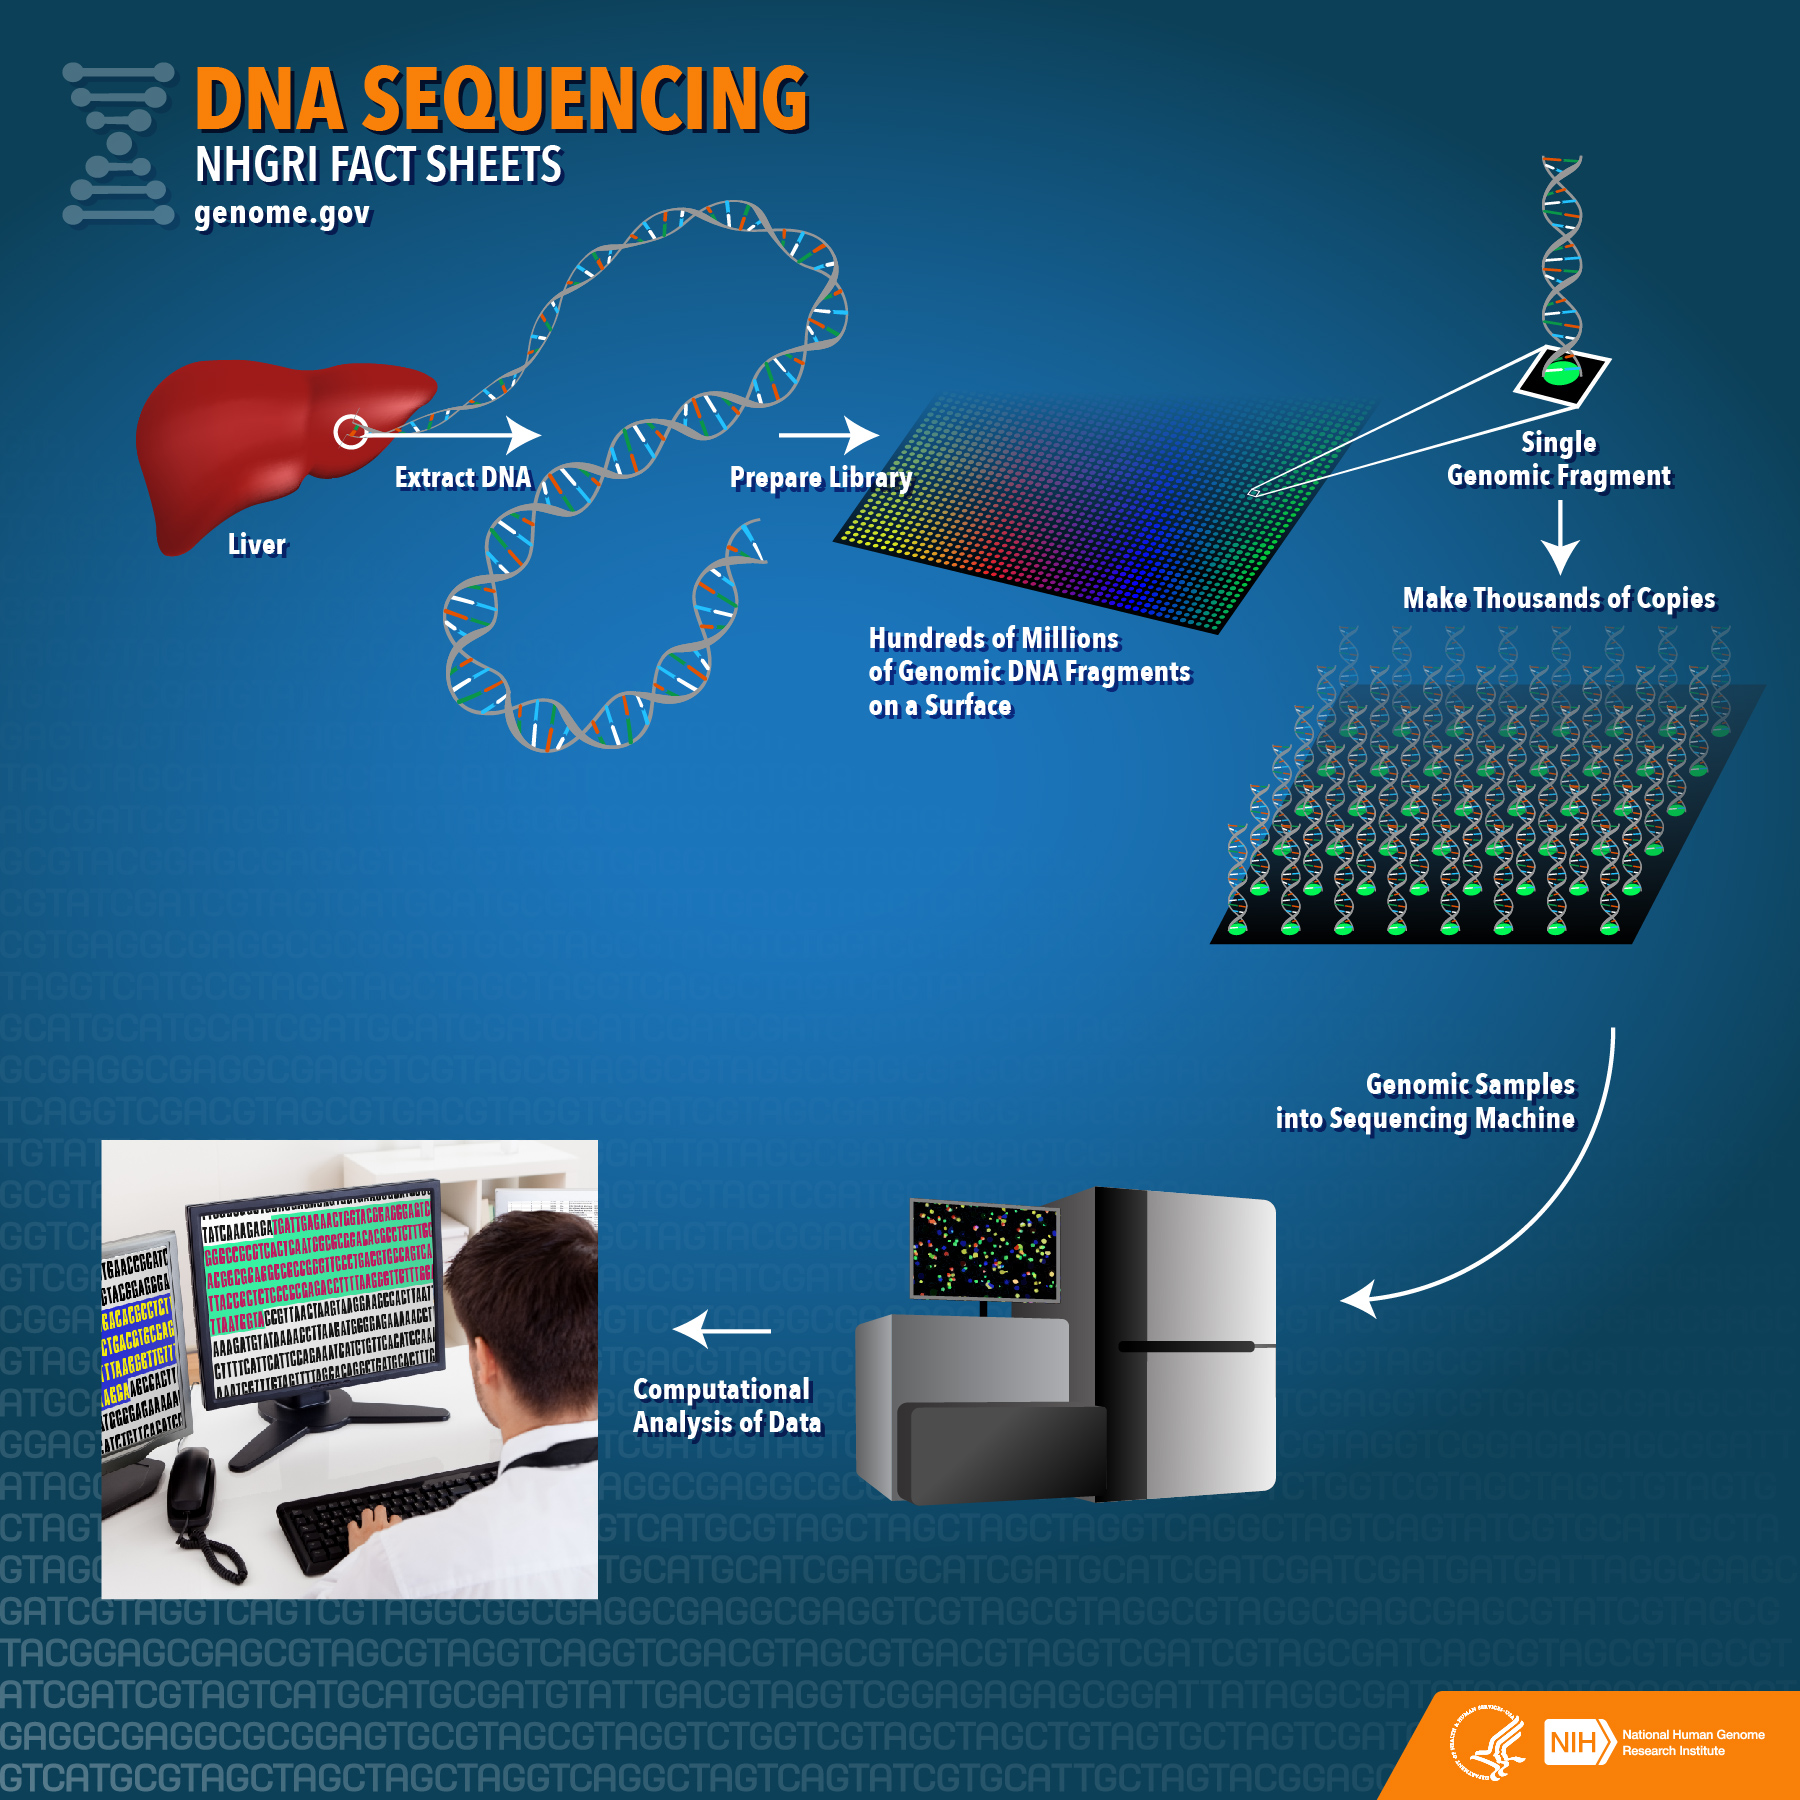

In [1]:
# IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# READ THE DATASET

In [4]:
human_data=pd.read_table('human_data.txt')

In [5]:
human_data.head()

sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3

We have some data for human DNA sequence coding regions  and a class labels. We also have a data for chimpange and a more divergent species  the dog

In [6]:
chimp_data=pd.read_table('chimp_data.txt')
dog_data=pd.read_table('dog_data.txt')
chimp_data.head()


sequence  class
0  ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...      4
2  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
3  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
4  ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...      6

In [7]:
dog_data.head()

sequence  class
0  ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...      4
1  ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...      4
2  ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...      6
3  ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...      6
4  ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...      0

Here are the definitions for each of the 7 classes  and how many there are in the human training data. They are Gene sequence functions groups.

In [8]:
from IPython.display import Image

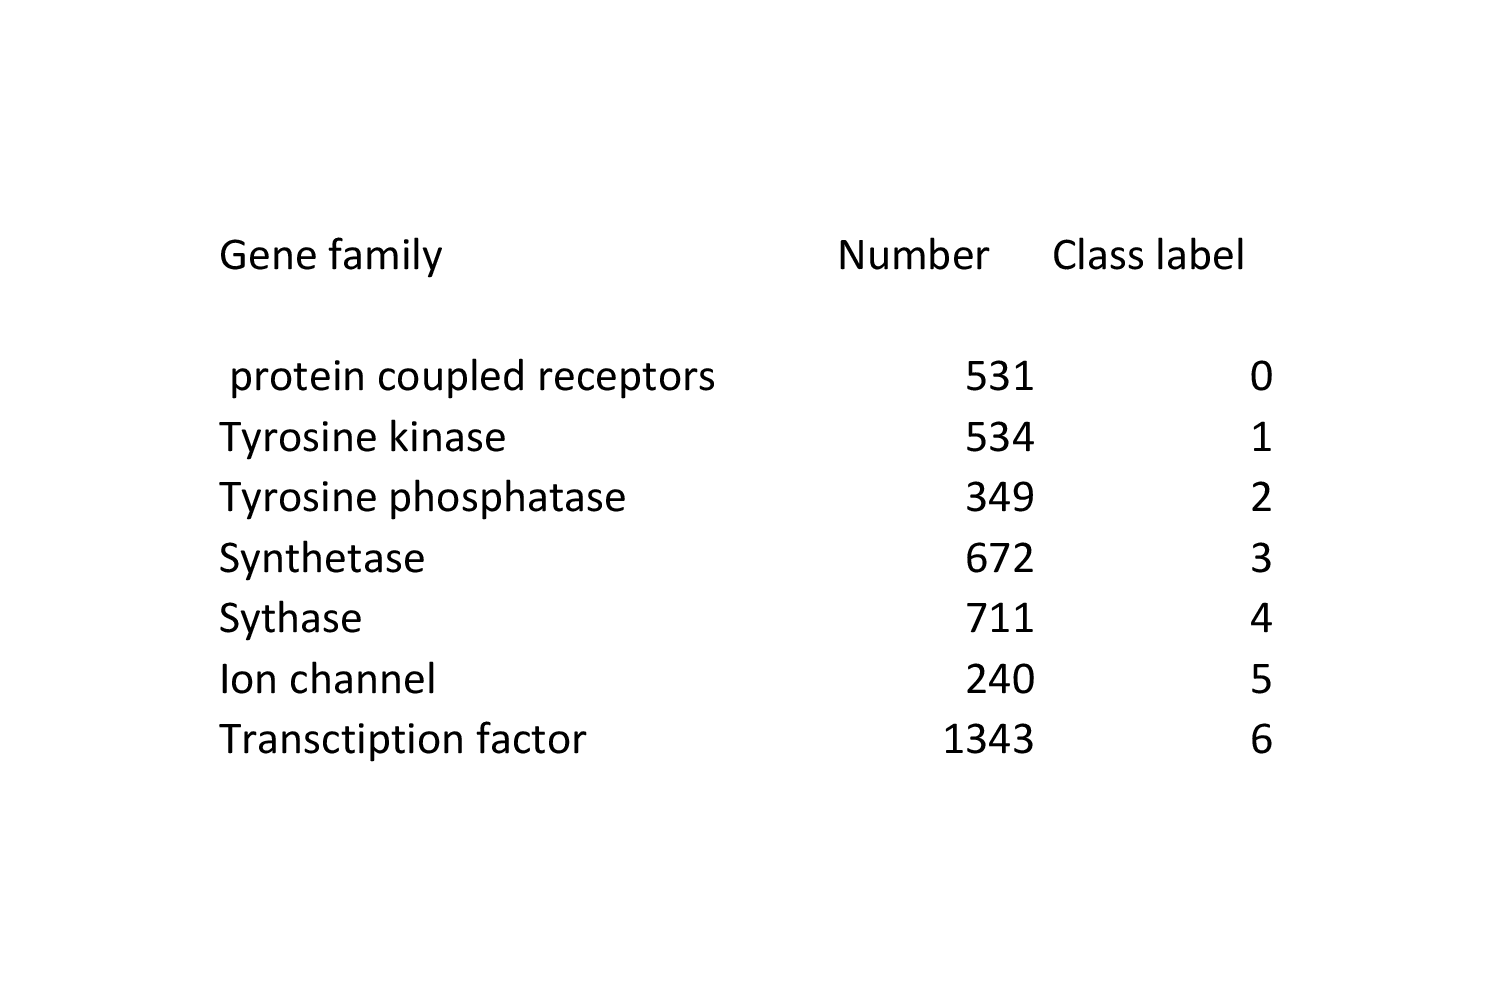

In [9]:
Image("DNA_CAPTURE.PNG")

# Treating DNA sequence as a "language", otherwise known as k-mer counting
A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.

Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:



# Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [10]:
# Function to convert sequence string into k-mer words , default size = 6,(hexamer words)

def getkmers(sequence,size=6):
    return[sequence[x:x+size].lower() for x in range (len(sequence)-size+1)]

# Now we convert our training data sequences into short overlapping k-mers of lenth 6.lets do that for each species of data we have using  our getkmer function

In [11]:
human_data['words']=human_data.apply(lambda x:getkmers(x['sequence']),axis=1)
human_data=human_data.drop('sequence',axis=1)
chimp_data['words']=chimp_data.apply(lambda x:getkmers(x['sequence']),axis=1)
chimp_data=chimp_data.drop('sequence',axis=1)
dog_data['words']=dog_data.apply(lambda x:getkmers(x['sequence']),axis=1)
dog_data=dog_data.drop('sequence',axis=1)

# Now our coding sequence data is changed to lowercase and splits up into all possible k-mer  words lenth of 6 

In [12]:
human_data.head()

class                                              words
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4      3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...

In [13]:
chimp_data.head()

class                                              words
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
3      4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
4      6  [atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg...

In [14]:
dog_data.head()

class                                              words
0      4  [atgcca, tgccac, gccaca, ccacag, cacagc, acagc...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      6  [atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac...
3      6  [atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta...
4      0  [atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc...

#  Since we are going to use scikit-learn natural language processing tools to do the k-mer counting,we need to now covert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.we can also make a  y variable to hold the class labels Let's do now that

In [32]:
human_texts=list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item]=' '.join(human_texts[item])
y_h=human_data.iloc[:,0].values

In [33]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [34]:
y_h

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [35]:
# WE WILL DO SAME STEPS FOR CHIMPANGE AND DOG

In [37]:
chimp_texts=list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item]=' '.join(chimp_texts[item])
y_c=chimp_data.iloc[:,0].values

In [38]:
print(chimp_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaac

In [39]:
dog_texts=list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item]=' '.join(dog_texts[item])
y_d=dog_data.iloc[:,0].values

In [40]:
print(dog_texts[0])

atgcca tgccac gccaca ccacag cacagc acagct cagcta agctag gctaga ctagat tagata agatac gataca atacat tacatc acatcc catcca atccac tccacc ccacct cacctg acctga cctgat ctgatt tgattt gattta atttat tttatt ttatta tattat attata ttataa tataat ataatc taatct aatctt atcttt tctttt cttttc ttttca tttcaa ttcaat tcaata caatat aatatt atattt tatttc atttct tttctc ttctca tctcac ctcacc tcaccc caccct accctc ccctct cctctt ctcttc tcttca cttcat ttcatc tcatcc catcct atccta tcctat cctatt ctattt tatttc atttca tttcaa ttcaac tcaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaatt aaattt aatttc atttca tttcaa ttcaaa tcaaat caaatc aaatca aatcac atcact tcacta cactac actact ctacta tactac actacc ctaccc taccca acccag cccaga ccagaa cagaaa agaaaa gaaaac aaaacc aaaccc aacccg acccga cccgat ccgata cgataa gataac ataacc taacca aaccaa accaaa ccaaat caaatc aaatct aatctg atctgc tctgct ctgcta tgctaa gctaaa ctaaaa taaaat aaaatt aaattg aattgc attgct ttgctg tgctgg gctggt ctggtc tggtca ggtcaa gtcaac tcaaca caacat aacata acataa cataat ataatc

# Now we will apply the Bag of words using countvectorizer usin NLP

In [41]:
#  creating the bag of words using countvectorizer
# this is equilent k-mer counting
# the n gram of size is 4 determined based on various experiments

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(4,4))
x_human=cv.fit_transform(human_texts)
x_chimp=cv.fit_transform(chimp_texts)
x_dog=cv.fit_transform(dog_texts)

In [43]:
print(x_human.shape)
print(x_chimp.shape)
print(x_dog.shape)

(4380, 232414)
(1682, 229684)
(820, 227149)


 # If we have a look at class balance we can see we have relatively balanced dataset

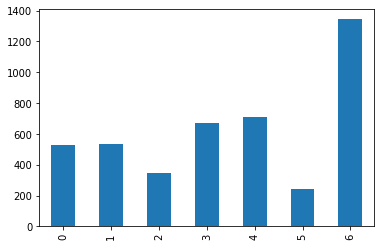

In [44]:
human_data['class'].value_counts().sort_index().plot.bar()

In [45]:
# splitting the humanset

In [46]:
# Splitting the human dataset into the training and test dataset

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_human,y_h,test_size=0.2,random_state=0)

In [48]:
print(x_train.shape)
print(x_test.shape)

(3504, 232414)
(876, 232414)


In [49]:
print(y_train.shape)
print(y_test.shape)

(3504,)
(876,)


 Applying multinomial naive bayes to dataset.through various experimets with parameter tuning and found the ngram of size (4,4) 
and a model alpha of 0.1 did the best

In [50]:
# Mulinomial naive bayes model implementation
# The alpha parameter was determined by grid search previously

In [52]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)
classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [59]:
y_pred=classifier.predict(x_test)

okay so let's look at some model performamce metrics like confusion matrix, accuracy,precision,recall and f1 score.
we are getting really good results on unseen data,so it lokks like our model did not overfitting the training data.




In [65]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
print("Confusion Matrix\n")
cm=confusion_matrix(y_test,y_pred)
print(cm)
# print(pd.crosstab(pd.series(y_test, name='Actual'), pd.series(y_pred, name='Predicted')))
def get_metrics(y_test,y_predicted):
    cm=confusion_matrix(y_test,y_predicted)
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
accuracy,precision,recall,f1=get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy,precision,recall,f1))
    

Confusion Matrix

[[ 96   0   0   0   0   0   1]
 [  0 101   0   1   0   0   1]
 [  0   0  61   0   0   0   2]
 [  0   0   0 133   0   0   3]
 [  3   0   0   0 142   0  10]
 [  0   0   0   0   0  48   0]
 [  2   0   0   0   1   0 271]]
accuracy = 0.973 
precision = 0.974 
recall = 0.973 
f1 = 0.973
